In [2]:
import numpy as np
import os,csv
import matplotlib.pyplot as plt

In [6]:
#loading tabulated parameter values
#Cowley, J.M., section 4.3.1 in International Tables for Crystallography, 
#Vol. C, A.J.C. Wilson, Ed. (Kluwer Academic, Dordrecht, 1992), pp. 223-244.

aff=np.load("atomic_form_factors.npy")
#["Z","a1","a2","a3","a4","a5","b1","b2","b3","b4","b5"]
#f(q)=sum of exps of form a*exp(-b*q**2)

#making form factors into dictionary for easier use 
dt = np.dtype([("Atomic Number",int),("Symbol",np.unicode_, 16),("Name",np.unicode_, 16)])

with open("Element_List.txt", 'rb') as f: #gets list of element numbers, symbols and names
    clean_lines = (line.replace(b' - ',b',') for line in f)
    l = np.genfromtxt(clean_lines, dtype=dt, delimiter=',')

nums = np.array([int(x[0]) for x in l])
nums = nums[0:98] #We (arbitrarily) only care about elements lighter than Einsteinium
syms = np.array([str(x[1]) for x in l])
syms = syms[0:98]
names = np.array([str(x[2]) for x in l])
names = names[0:98]

aff_dict1 = {i:[j,k] for i,j,k in zip(syms,nums,aff)}
aff_dict2 = {i:[i,j] for i,j in zip(nums,aff)}

aff_dict = {**aff_dict1,**aff_dict2}

def FormFactor(q,elem): # in Angstroms
    #elem can be symbol or atomic number e.g. 'C' or 6
    a = aff_dict[elem][1]
    coeff = a[1:]
    coeff = np.array([coeff[0:5],coeff[5:10]])
    val = coeff[0,0]*np.exp(-coeff[1,0]*((q/(2*np.pi))**2)) + coeff[0,1]*np.exp(-coeff[1,1]*((q/(2*np.pi))**2)) + coeff[0,2]*np.exp(-coeff[1,2]*((q/(2*np.pi))**2)) + coeff[0,3]*np.exp(-coeff[1,3]*((q/(2*np.pi))**2)) + coeff[0,4]*np.exp(-coeff[1,4]*((q/(2*np.pi))**2))
    return val

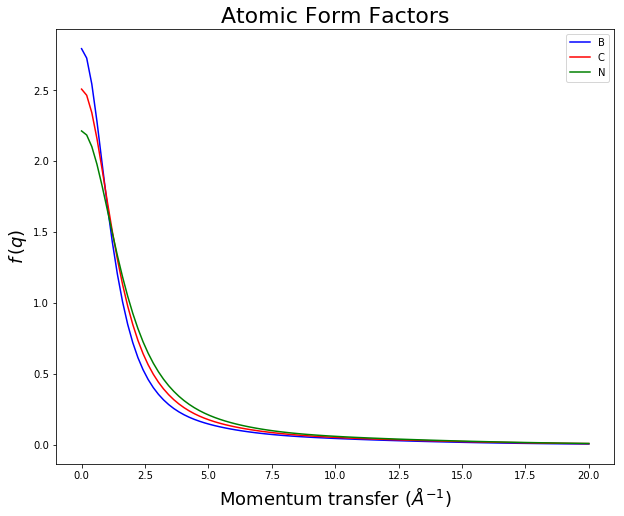

In [23]:
#Usage Example

x=np.linspace(0,20,100)
yb=FormFactor(x,'B')
yn=FormFactor(x,'N')
yc=FormFactor(x,6)

fig,ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(x,yb,'b')
ax.plot(x,yc,'r')
ax.plot(x,yn,'g')


ax.set_title('Atomic Form Factors',fontsize=22)
ax.set_ylabel('$f \, (q)$',fontsize=18)
ax.set_xlabel('Momentum transfer ($\AA^{-1}$)',fontsize=18)

ax.legend(['B','C','N'])

plt.show()

In [15]:
# Save
np.save('Atomic_Form_Factor_Dictionary.npy', aff_dict) 

# Load
read_dictionary = np.load('Atomic_Form_Factor_Dictionary.npy').item()

In [18]:
#new way to use now that dictionary exists:

aff_dict = np.load('Atomic_Form_Factor_Dictionary.npy').item()
    
def FormFactor(q,elem): # in Angstroms
    #elem can be symbol or atomic number e.g. 'C' or 6
    a = aff_dict[elem][1]
    coeff = a[1:]
    coeff = np.array([coeff[0:5],coeff[5:10]])
    val = coeff[0,0]*np.exp(-coeff[1,0]*((q/(2*np.pi))**2)) + coeff[0,1]*np.exp(-coeff[1,1]*((q/(2*np.pi))**2)) + coeff[0,2]*np.exp(-coeff[1,2]*((q/(2*np.pi))**2)) + coeff[0,3]*np.exp(-coeff[1,3]*((q/(2*np.pi))**2)) + coeff[0,4]*np.exp(-coeff[1,4]*((q/(2*np.pi))**2))
    return val